<img src='https://d3njjcbhbojbot.cloudfront.net/api/utilities/v1/imageproxy/https://coursera-course-photos.s3.amazonaws.com/75/11453069b511e3bca95d57a55dab34/RegressionModels.jpg?auto=format%2Ccompress&dpr=1'>

# Table of Contents
***

## Introduction to Linear Regression
- [Relationships](#relation)

- [What is Linear Regression? Why?](#Ensemble)
    
- [How it Works](#school_attendance)
    
- [Key Terminologies](#school_attendance)
    
- [Statistical Modeling vs Predictive Modeling](#hi)


## Odinary Least Squares and Model Parameters
- [Model Parameters](#mp)

- [Ordinary Least Squares](#ols)


## Finding Model Parameters
- [Normal Equation](#ne)
- [Gradient Descent](#gd)


## Interpreting OLS Regression Results
- [R Squared](#r2)

- [Adjusted R Squared](#r22)

- [Intercept and Coefficients](#coeff)

- [Null-Hypothesis and P-value](#p)


## Assumptions & How to Check
- [Detecting Heteroskedestacity - Residual Plot](#DV)

- [Detecting Multicollinearity - VIF](#mc)

- [Detecting Linearity](#hetero)

- [Normal Distribution of Residuals - QQ Plot](#nr)


## Modeling
- [Simple Linear Regresssion](#sl)

- [Multiple Linear Regression](#ml)

- [Polynomial Regression](#pol)

- [Regularized Linear Regression (L1 & L2)](#l1)

## Evaluation Performance
- [R Squared / Adjusted R Squared](#r22)

- [MAE](#mae)

- [MSE/RMSE](#rmse)

- [RMSLE](#rmsle)


<img src='http://pricom.kz/images/2018/05/%D0%A8%D0%B0%D0%B3-%D0%BA-%D0%B4%D0%BE%D0%B2%D0%B5%D1%80%D0%B8%D1%8E.png'/>
# Relationships

When you think about **relationships**, what do you think of? 

The goal of linear regression to model the relationship between X and Y. And these relationships can be seen as:
1. Independent vs Depedent
2. Simple vs Complex
3. Positive vs Negative
4. Strong vs Weak
5. Linear vs Non-Linear

# What is Linear Regression? 

Linear Regression is a method to model the **relationship** between a set of **independent variables $X$** (also knowns as explanatory variables, features, predictors) and a **dependent variable $Y$**.


### The Magic Formula

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

**What does each term mean?**

- Y is the response
- X is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for X
- $\epsilon$ is the error term

$\beta_0$ and $\beta_1$ are called the **model coefficients**

# How it works?

The Linear Regression Model works by finding the **best fit line** through the data by:
1. Passing through as many points as possible
2. Minimizing the residuals for each point
<img src='https://slideplayer.com/slide/5001953/16/images/7/Linear+Regression+Objective%3A+Want+to+fit+the+best+line+to+the+data+points+%28that+exhibit+linear+relation%29..jpg'>

# Key Terms
- **Response**: The varaible we are trying to predict
    - Synonyms: dependent varaible, Y, target, outcome
- **Independent Variable**: The variable used to predict the response
    - Synonyms: independent variable, X, feature, attribute
- **Intercept**: The intercept of the regression line (the value of Y when X=0)
    - Synonyms: B0
- **Coefficient**: The slope of the regression line
    - Snonyms: slope, B1, weights, parameter estimates
- **Residuals**: The difference between the observed values and the fitted values (Actual - Predicted)
    - Synonyms: errors
- **Ordinary Least Squares**: The method of fitting a regression by minimiazing the sum of squared residuals
    - Synonyms: OLS

# Use Cases (2)
Linear Regression can be used for either explanation or prediction:

### Statistical Modeling
- When the goal is **to estimate the relationship** between your DV and IVs
- When the goal is to understand the overall relationship
- MODEL ASSUMPTION IS IMPORTANT HERE
- When the focus is on the **parameters** of interest: $$ \beta_0 + \beta_1 + ...\beta_n $$

### Predictive Modeling
- When the goal is **to create a prediction model** that allows you to estimate an outcome
- When the focus is on the **outcome**: Y

<img src='https://cdn-images-1.medium.com/max/1600/1*k2bLmeYIG7z7dCyxADedhQ.png'>

# Finding Parameters
***

Resource: https://towardsdatascience.com/linear-regression-simplified-ordinary-least-square-vs-gradient-descent-48145de2cf76

### Ordinary Least Squares

How is the model fit to the data? 

**OLS** is used to find the parameters: B0 and B1



<img src='https://img.tfd.com/ggse/bf/gsed_0001_0021_0_img6260.png'>

### Import Libraries

In [1]:
# Import Libraries 
%matplotlib inline
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
import seaborn as sns #sets up styles and gives us more plotting options
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Boston Housing Dataset

In [2]:
# read data into a DataFrame
from sklearn.datasets import load_boston
boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### Get the Target Variable 

In [3]:
df['MEDV'] = boston_dataset.target
df['LOGMEDV'] = np.log(df.MEDV+1) # Get Log Transformed MEDV
Y = df.MEDV

### Plot Price Distribution

1. Plot the distribution of MEDV and look at its distribution
2. Now try plotting the distribution of the log transformed MEDV. **Does it look more normally distributed?**

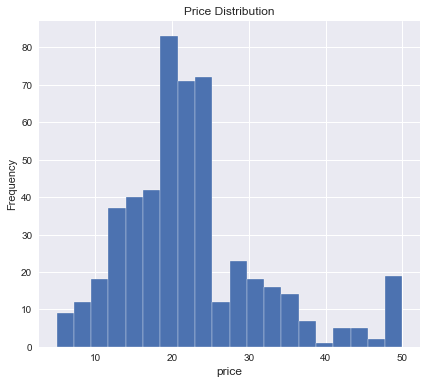

In [4]:
# Plot Price Distribution
plt.subplot(1, 2, 1)
(df.MEDV).plot.hist(bins=20,figsize=(15, 6), edgecolor = 'white')
plt.xlabel('price', fontsize=12)
plt.title('Price Distribution', fontsize=12)

"""
#_________________________________________________TODO______________________________________________
#Plot Log Price Distribution
plt.subplot(1, 2, 2)
(df.LOGMEDV).plot.hist( figsize=(15,6), edgecolor='white')
plt.xlabel('log(price+1)', fontsize=12)
plt.title('Log Price Distribution', fontsize=12)
"""

plt.show()

## Visualize and Examine 

Are there any linear relationships between some of the IV's and the DV?

Is it:
- Strong? Weak?
- Positive? Negative?
- Linear? Non-Linear?

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


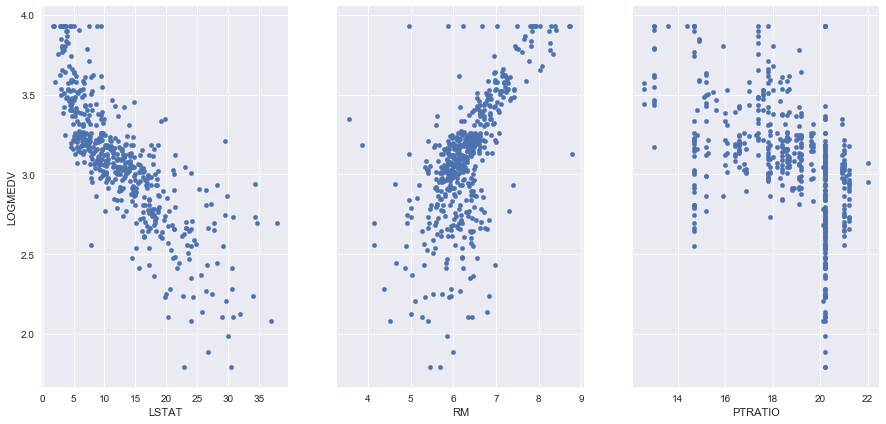

In [5]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='LSTAT', y='LOGMEDV', ax=axs[0], figsize=(15, 7))
df.plot(kind='scatter', x='RM', y='LOGMEDV', ax=axs[1])
df.plot(kind='scatter', x='PTRATIO', y='LOGMEDV', ax=axs[2])

## Normal Equation


In [6]:
import numpy as np
from numpy.linalg import inv

# Get X and Y's
x = df.RM
y = df.LOGMEDV

# Form Matrix X and Y
X = np.array([np.ones(len(x)), x]).T
Y = (y[:, np.newaxis])

<img src='https://cdn-images-1.medium.com/max/1600/1*BIWCTn40qA8Qkgm7yEtgKA.png'/>

#### Normal Equation Function

In [7]:
# Create Normal Equation Function
def NormalEquation(theta,X,y):
    theta=inv(X.T@X)@X.T@y
    return theta

# Compute B0 and B1
NormalEquation(0,X,Y)

array([[0.87927583],
       [0.35104044]])

## Gradient Descent

In [8]:
X = np.array(df.RM)
X = X.reshape((len(X),1))
Y = np.array(df.LOGMEDV)

In [9]:
# Import Linear Regression Model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
# Find the Intercept Parameter (B0)
lr.intercept_

0.8792758317803417

In [11]:
# Find the Coefficient Parameter (B1)
lr.coef_

array([0.35104044])

# Interpreting OLS Regression Results
***

**Interpretation:** <br>
Sources:
- [Ordinary Least Squares in Python by Peter Prettenhofer](https://www.datarobot.com/blog/ordinary-least-squares-in-python/)
- [Minitab Blog](http://blog.minitab.com/) (Superb walkthroughs and guides)

Re-interpreted this article for a machine learning crowd with corrections and elaborations.

### 1.1 How to Interpret Linear Regression Output

**First Table:** <br>
**The left part of the first table provides basic information about the model fit:** <br>
- **Dep. Variable:** Singular. Which variable is the point of interest of the model
- **Model:** Technique used, abbreviated version of **Method** (see methods for more).
- **Method:** The loss function optimized in the parameter selection process. *Least Squares* since it picks the parameters that reduce the training error. AKA Mean Square Error **[MSE]**.
- **No. Observations:** The number of observations used by the model. Size of training data.
- **[Degrees of Freedom Residuals](http://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-degrees-of-freedom-in-statistics):** Degrees of freedom of the residuals. Number of observations – number of parameters. Intercept is a parameter. The purpose of Degrees of Freedom is to reflect the impact of descriptive/summarizing statistics in the model, which in regression is the coefficient. Since the observations must "live up" to these parameters, they only have so many free observations, and the rest must be reserved to "live up" to the parameters' prophecy. Internal mechanism to ensures that there are enough observations to parameters.
- [**Degrees of Freedom Model:**](http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html) Number of parameters in the model (not including the constant/intercept term if present)
- [**Covariance Type:**](https://en.wikipedia.org/wiki/Robust_regression) Robust regression methods are designed to be not overly affected by violations of assumptions by the underlying data-generating process. Since this model is *Ordinary Least Squares*, it is non-robust and therefore highly sensitive to outliers.

**The right part of the first table shows the goodness of fit** <br>
- **R-squared:** The coefficient of determination, the Sum Squares of Regression divided by Total Sum Squares. In English, translates in the percent of variance explained by the model. The remaining percentage represents the variance explained by error, the E term, that which the model and predictors fail to grasp.
- **Adj. R-squared:** Version of the R-Squared that penalizes additional independent variables. Similar to the concept of flexibility in the Bias-Variance tradeoff where high flexibility reduces bias, but puts the model at risk of high variance; the magnitude of effect a single observation can have on the model outcome. This lowers model robustness and model generalization.
- **F-statistic:** A measure how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals. Feeds into the calculation of the P-Value.
- **Prob (F-statistic) or P-Value:** The probability that a sample like this would yield the above statistic, and whether the models verdict on the null hypothesis will consistently represent the population. Does not measure effect magnitude, instead measures the integrity and consistency of this test on this group of data.
- **Log-likelihood:** The log of the likelihood function.
- **AIC:** The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model. Penalizes the model selection metrics when more independent variables are added.
- **BIC:** The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters. Penalizes the model selection metrics when more independent variables are added.

**Second Table:** Coefficient Reports <br>
- **coef:** The estimated value of the coefficient. By how much the model multiplies the independent value by.
- [**std err:**](http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-to-interpret-s-the-standard-error-of-the-regression) The basic standard error of the estimate of the coefficient. Average distance deviation of the points from the model, which offers a unit relevant way to gauge model accuracy.
- **t:** The t-statistic value. This is a measure of how statistically significant the coefficient is.
- **P > |t|:** P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.
- **[95.0% Conf. Interval]:** The lower and upper values of the 95% confidence interval. Specific range of the possible coefficient values.

**Third Table:** Residuals, Autocorrelation, and Multicollinearity <br>
- **Skewness:** A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line). The normal distribution has 0 skew.
- **Kurtosis:** A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails), so model "peakyness". The normal distribution has a [Kurtosis of 3](https://brownmath.com/stat/shape.htm), and the greater the number, the more the curve peaks.
- **Omnibus	D’Angostino’s test:** It provides a combined statistical test for the presence of skewness and kurtosis.
- **Prob(Omnibus):** The above statistic turned into a probability
- **Jarque-Bera:** A different test of the skewness and kurtosis
- **Prob (JB):** The above statistic turned into a probability
- **Durbin-Watson:** A test for the presence of autocorrelation (that the errors are not independent.) Often important in time-series analysis
- **Cond. No:** A test for multicollinearity (if in a fit with multiple parameters, the parameters are related with each other).
***


**Benefits of Statsmodel:** Allows you to get a lot more statistical parameters than SkLearn
### Interpretation

- **Intercept** = 36.4911 This is what the value of our y (dependent variable) would be if the gradient had a value of 0.
- **Coefficient (RM)** = For every unit increase in x, y increases by 3800 dollars.
- **R-Squared (0.741)** =  74.1% of the variation in our y variable is “explained” by the x variable in this model.
- **p-value** The p-value is below 0.05%, denoting statistical significance of the regression at the 5% level.

## TRY THIS:
1. Refit OLS with Log Transformed Y
2. Remove high p-valued features and refit OLS. Does R Squared change? What does it mean?

In [12]:
import statsmodels.api as sm


"""
#_________________________________________________TODO 1.______________________________________________
Try Log Transformed MEDV and compare the results. Does R Squared improve?

#_________________________________________________TODO 2.______________________________________________
Remove the high p-valued features: INDUS & AGE
"""

# Define X Values
X = sm.add_constant(df.drop(['MEDV','LOGMEDV'],axis=1))

# Define Y 
Y = df.MEDV

# Apply OLS to our X and Y
lm = sm.OLS(Y, X).fit()

# Print Summary of Outputs
lm.summary()

C:\Users\Randy\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 27 Oct 2018   Prob (F-statistic):          6.95e-135
Time:                        09:35:57   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.000      26.462      46.520
CRIM          -0.1072      0.033     -3.276      0.001      -0.171      -0.043
ZN             0.0464      0.014      3.380      0.001       0.019       0.073
INDUS          0.0209      0.061      0.339      0.735      -0.100       0.142
CHAS           2.6886      0.862      3.120      0.002       0.996       4.381
NOX          -17.7958      3.821     -4.658      0.000     -25.302     -10.289
RM             3.8048      0.418      9.102      0.000       2.983       4.626
AGE            0.0008      0.013      0.057      0.955      -0.025       0.027
DIS           -1.4758      0.199     -7.398      0.000      -1.868      -1.084
RAD            0.3057      0.066      4.608      0.000       0.175       0.436
TAX           -0.0123      0.004     -3.278      0.001      -0.020      -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000      -1.211      -0.696
B              0.0094      0.003      3.500      0.001       0.004       0.015
LSTAT         -0.5255      0.051    -10.366      0.000      -0.625      -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<img src='http://www.amberallen.com/wp-content/uploads/2014/12/No-Assumptions-1.jpg'>

# Assumptions & How to Check
***

**Source**: https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034

### L.I.N.E.

- L - Linear Relationship between IV and DV
- I - Independence of residuals
- N - Normality of residuals 
- E - Equal variance of residuals

### Assumptions

1. Linear Relationship between IV and DV
2. There must be no correlation among independent variables. Presence of correlation in independent variables lead to Multicollinearity. If variables are correlated, it becomes extremely difficult for the model to determine the true effect of IVs on DV.
3. The error terms must possess constant variance. Absence of constant variance leads to heteroskedestacity.
4. The error terms must be uncorrelated i.e. error at ∈t must not indicate the at error at ∈t+1. Presence of correlation in error terms is known as Autocorrelation. It drastically affects the regression coefficients and standard error values since they are based on the assumption of uncorrelated error terms.
5. The dependent variable and the error terms must possess a normal distribution.

## 1. Detecting Multicollinearity - VIF

If x1 and x2 are strongly correlated then that means that they 'move together'. What linear regression tries to do is to ''assign'' a change in the dependent variable y to either x1 or x2. Obviously, if both 'move together' (because of high correlation) then it will be difficult to 'decide' which of the x's is 'responsible' for the change in y (because they both change). Therefore the estimates of the βi coefficients will be less precise.

A VIF of four means that the variance (a measure of imprecision) of the estimated coefficients is four times higher because of correlation between the two independent variables.

If your goal is to predict the election results, then multicollinearity is not necessarily a problem, if you want to analyse the impact of e.g. the personal income on the results, then there may be a problem because the estimates of the coefficients are imprecise (i.e. if you would estimate them with another sample then they may change a lot).

### Reference
- VIF = 1 (Not correlated)
- 1 < VIF < 5 (Moderately correlated)
- VIF >=5 (Highly correlated)

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = df.drop(['MEDV','LOGMEDV'],axis=1).assign(const=1)
pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])],index=X_vif.columns)

CRIM         1.773321
ZN           2.298641
INDUS        3.991194
CHAS         1.073943
NOX          4.395064
RM           1.934161
AGE          3.100860
DIS          3.956551
RAD          7.480539
TAX          9.008472
PTRATIO      1.799220
B            1.345832
LSTAT        2.938127
const      585.425210
dtype: float64

### Get Necessary Model Parameters (Refit for Log Transformation)

In [14]:
# fitted values (need a constant term for intercept)
model_fitted_y = lm.fittedvalues

# model residuals
model_residuals = lm.resid

# normalized residuals
model_norm_residuals = lm.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = lm.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = lm.get_influence().cooks_distance[0]

## 2. Detecting Heteroskedestacity - Residual Plot

It's not homoscadastic if there is a definite pattern like: 
- linear shaped
- quadratic shaped
- funnel shaped 

### TO DO:
1. Try refitting the residual plot with the Log Transformed MEDV

Text(0, 0.5, 'Residuals')

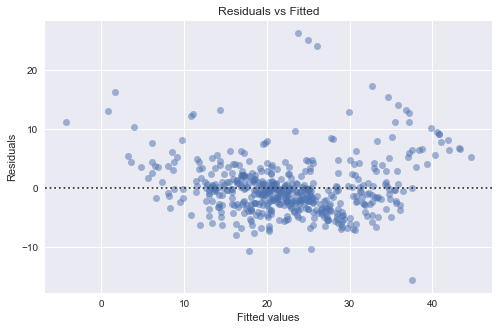

In [15]:
# Create residual plot of MEDV vs Residuals
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(5)
plot_lm_1.set_figwidth(8)

model_fitted_y = lm.fittedvalues

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'MEDV', data=df, 
                          scatter_kws={'alpha': 0.5})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

## 3. Detecting Linearity, Normal Distribution of Residuals, & Zero Mean

### TO DO:
1. Refit with the Log Transformed Y and compare the results. Does it look better?

C:\Users\Randy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Randy\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


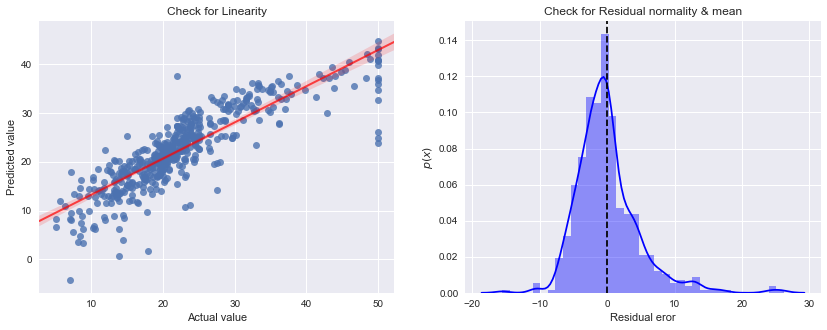

In [16]:
import seaborn as sns; sns.set()

# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
#sns.scatterplot(y_test,y_pred_ols,ax=ax,color=['r','g'])
# use the function regplot to make a scatterplot
sns.regplot(x=df.MEDV, y=model_fitted_y, line_kws={"color":"r","alpha":0.7,"lw":2})
plt.title('Check for Linearity')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((df.MEDV - model_fitted_y),ax=ax,color='b')
plt.axvline((df.MEDV - model_fitted_y).mean(),color='k',linestyle='--')
plt.title('Check for Residual normality & mean')
plt.xlabel('Residual eror')
plt.ylabel('$p(x)$');

In [17]:
"""
#_________________________________________________TODO 1.______________________________________________
# Refit with Log Transformed MEDV and apply the graphs again:

"""

'\n#_________________________________________________TODO 1.______________________________________________\n# Refit with Log Transformed MEDV and apply the graphs again:\n\n'

## 4. Detecting Normal Distribution of Residuals - QQ Plot

This plot shows if residuals are normally distributed. Do residuals follow a straight line well or do they deviate severely? It’s good if residuals are lined well on the straight dashed line.

#### Why error terms should be normally distributed? 
For parameter estimate (i.e. estimating the βi’s) we don't need that assumption. But, if it is not a normal distribution, some of those hypotheses tests which we will be doing as part of diagnostics may not be valid. 
For example:  To check whether the Beta (the regression coefficient) is significant or not, I'll do a T-test. So, if my error is not a normal distribution, then the statistic I derive may not be a T-distribution. 

## TO DO:
1. Refit the OLS with the Log Transformed MEDV and perform the QQ Plot again. Does it look better?

<img src='http://i63.tinypic.com/2qx8hnb.png'/>

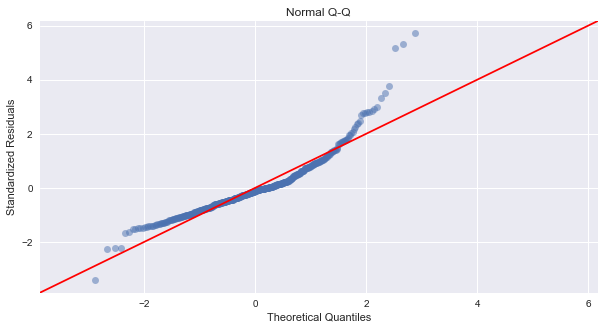

In [18]:
from statsmodels.graphics.gofplots import ProbPlot

QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(5)
plot_lm_2.set_figwidth(10)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

In [19]:
"""
#_________________________________________________TODO 1.______________________________________________
# Refit with Log Transformed MEDV and apply the QQ PLot again:

"""

'\n#_________________________________________________TODO 1.______________________________________________\n# Refit with Log Transformed MEDV and apply the QQ PLot again:\n\n'

<img src='https://3.bp.blogspot.com/-jKKePccDp00/Wtx9jR1ZpSI/AAAAAAACrBI/0mkL7mnIQ3kLTGBjf2h9GSzw75IqbFBEwCLcBGAs/s1600/correlation-linear-regression-minitab-output-3-638-640x500.jpg'>

# Modeling
***

Let's perform three types of Linear Regression and compare their performance:
1. Simple Linear Regression
2. Multiple Regression
3. Polynomial Regression

## Simple Linear Regression

In [20]:
X = df.LSTAT
X = X.reshape((len(X),1))
Y = df.LOGMEDV

C:\Users\Randy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [21]:
# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [22]:
# Initialize LR Model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Make predictions
predictions = lr.predict(X_test)

In [23]:
# Store results in variable
r2 = format(r2_score(y_test, predictions),'.3f')
rmse = format(np.sqrt(mean_squared_error(y_test, predictions)),'.3f')
mae = format(mean_absolute_error(y_test, predictions),'.3f')

# Print out result
print("R Squared Score: ", format(r2_score(y_test, predictions),'.3f'))
print("Root Mean Squared Error: ", format(np.sqrt(mean_squared_error(y_test, predictions)),'.3f'))
print("Mean Absolute Error: ", format(mean_absolute_error(y_test, predictions),'.3f'))

R Squared Score:  0.666
Root Mean Squared Error:  0.215
Mean Absolute Error:  0.161


In [24]:
result = pd.DataFrame({'Model':['Simple'],'R Squared':[r2], 'RMSE':[rmse], 'MAE':[mae]})
result

,MAE,Model,R Squared,RMSE
0,0.161,Simple,0.666,0.215


## Multiple Regression

In [25]:
X = df.drop(['MEDV','LOGMEDV'],axis=1)
Y = df.LOGMEDV

In [26]:
# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [27]:
# Initialize LR Model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Make predictions
predictions = lr.predict(X_test)

In [28]:
# Store results in variable
r2 = format(r2_score(y_test, predictions),'.3f')
rmse = format(np.sqrt(mean_squared_error(y_test, predictions)),'.3f')
mae = format(mean_absolute_error(y_test, predictions),'.3f')

# Print out result
print("R Squared Score: ", format(r2_score(y_test, predictions),'.3f'))
print("Root Mean Squared Error: ", format(np.sqrt(mean_squared_error(y_test, predictions)),'.3f'))
print("Mean Absolute Error: ", format(mean_absolute_error(y_test, predictions),'.3f'))

R Squared Score:  0.745
Root Mean Squared Error:  0.188
Mean Absolute Error:  0.126


In [29]:
result_2 = pd.DataFrame({'Model':['Multiple'],'R Squared':[r2], 'RMSE':[rmse], 'MAE':[mae]})
result = result.append(result_2)
result

,MAE,Model,R Squared,RMSE
0,0.161,Simple,0.666,0.215
0,0.126,Multiple,0.745,0.188


## Polynomial Regression

Polynomial regression is useful because it allows you to fit a model to **nonlinear trends**.

It creates **new interaction features** in your dataset by:
- Multiplying features together
- Squaring features
- Cubing features
- Etc..

#### Example
You have a matrix [a,b] and want to perform a polynomial regression of degree=2
- new matrix: [1, a, b, a^2, ab, b^2]

In [30]:
# Original Matrix
np.array(X_train.head(1))

array([[1.50234e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.14000e-01,
        5.30400e+00, 9.73000e+01, 2.10070e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.49480e+02, 2.49100e+01]])

### Import Polynomial Features 

In [33]:
from sklearn.preprocessing import PolynomialFeatures
polyfeat = PolynomialFeatures(degree=2)
X_trainpoly = polyfeat.fit_transform(X_train)
X_testpoly = polyfeat.fit_transform(X_test)
poly = LinearRegression().fit(X_trainpoly, y_train)

predp = poly.predict(X_testpoly)

### Examine Polynomial Features

In [35]:
# Polynomial Transformation Matrix
X_trainpoly[0]

array([1.00000000e+00, 1.50234000e+01, 0.00000000e+00, 1.81000000e+01,
       0.00000000e+00, 6.14000000e-01, 5.30400000e+00, 9.73000000e+01,
       2.10070000e+00, 2.40000000e+01, 6.66000000e+02, 2.02000000e+01,
       3.49480000e+02, 2.49100000e+01, 2.25702548e+02, 0.00000000e+00,
       2.71923540e+02, 0.00000000e+00, 9.22436760e+00, 7.96841136e+01,
       1.46177682e+03, 3.15596564e+01, 3.60561600e+02, 1.00055844e+04,
       3.03472680e+02, 5.25037783e+03, 3.74232894e+02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.27610000e+02,
       0.00000000e+00, 1.11134000e+01, 9.60024000e+01, 1.76113000e+03,
       3.80226700e+01, 4.34400000e+02, 1.20546000e+04, 3.65620000e+02,
       6.32558800e+03, 4.50871000e+02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [36]:
r2 = format(r2_score(y_test, predp),'.3f')
mse = format(np.sqrt(mean_squared_error(y_test, predp)),'.3f')
mae = format(mean_absolute_error(y_test, predp),'.3f')

print("R Squared Score: ", format(r2_score(y_test, predp),'.3f'))
print("Root Mean Squared Error: ", format(np.sqrt(mean_squared_error(y_test, predp)),'.3f'))
print("Mean Absolute Error: ", format(mean_absolute_error(y_test, predp),'.3f'))

R Squared Score:  0.813
Root Mean Squared Error:  0.161
Mean Absolute Error:  0.116


# Regression Performance Comparison

In [37]:
result_2 = pd.DataFrame({'Model':['Polynomial'],'R Squared':[r2], 'RMSE':[mse], 'MAE':[mae]})
result = result.append(result_2)
result

,MAE,Model,R Squared,RMSE
0,0.161,Simple,0.666,0.215
0,0.126,Multiple,0.745,0.188
0,0.116,Polynomial,0.813,0.161
